In [4]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.stattools import adfuller
from itertools import combinations
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import requests
import yfinance as yahooFinance
import pandas as pd

In [2]:
%%capture
%run -i -e Pair_Selection.ipynb

In [5]:

print("Top 10 pairs with highest correlation and cointegration:")
unique_pair = []
for pair in top_10_pairs:
    if pair[0] not in unique_pair:
        unique_pair.append(pair[0])
    if pair[1] not in unique_pair:
        unique_pair.append(pair[1])
    print(pair)
print(unique_pair)


stock_df_top_pairs = pd.DataFrame(yahooFinance.download(unique_pair, start="2022-01-02",end="2023-12-31")["Adj Close"])
stock_df_top_pairs

Top 10 pairs with highest correlation and cointegration:
('AWK', 'NEE', 0.9868568115394872, 0.0021702962443593287, 0.8875227705044594, 0.00047915622637524516)
('ES', 'WEC', 0.9805179496276685, 0.0024463386112988073, 0.004369302557719054, 0.000846420301143742)
('CFG', 'RF', 0.9823147370618126, 0.013898508852412044, 0.5308970589810956, 0.0006392880800180128)
('DTE', 'PEG', 0.9673594718837637, 0.000884376996238171, 0.30832315414754896, 0.0002929419642600224)
('BAC', 'PNC', 0.984833159363554, 0.01739329281857443, 0.9154282930625082, 0.0015347259844459083)
('JPM', 'MET', 0.9685020620718218, 0.013915696687478907, 0.7826663417194497, 0.004255041314239258)
('PG', 'VRSK', 0.9645913152752947, 0.013567439644299777, 0.10223656125072028, 0.0019124531142389804)
('DFS', 'SYF', 0.9783016734527809, 0.01593526422457463, 0.824149846284554, 0.015336254177062974)
('AMP', 'MS', 0.9793277646520188, 0.027406236571223118, 0.9542769139825512, 0.014415377437221462)
('MET', 'PNC', 0.9690950745827942, 0.0282736879

[*********************100%%**********************]  34 of 34 completed


,AEP,AMP,AWK,BAC,C,CFG,CMS,CPT,D,DFS,...,PRU,PSA,RF,SRE,SYF,TFC,USB,VRSK,WEC,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,82.319839,294.341125,177.459991,43.766476,57.983280,44.704266,60.833763,164.791824,71.663170,112.922760,...,99.513008,328.092102,20.883326,59.234806,44.516781,54.487370,52.071510,218.757996,89.995804,59.537766
2022-01-04,82.357002,307.710571,172.911224,45.481880,58.433556,46.732971,60.730362,164.670410,71.434502,116.406395,...,102.944183,327.867584,21.813725,60.302910,45.615498,56.246479,53.435349,218.827042,89.771027,61.233818
2022-01-05,83.118767,304.672913,171.639114,44.714214,57.753551,46.378181,61.482441,161.448334,72.449776,114.826385,...,100.852882,324.939453,21.601852,60.670910,44.431534,55.633045,53.153488,211.504181,90.810631,61.372837
2022-01-06,82.849373,308.794067,168.940674,45.614563,59.646507,48.943626,60.786766,159.664566,72.312584,116.901321,...,102.500572,328.146027,22.652004,61.106232,45.047195,57.716911,54.599163,209.885666,90.239319,63.893730
2022-01-07,84.354370,308.919800,167.205963,46.609684,60.445972,49.325714,61.181606,155.863464,73.364433,119.633026,...,103.921928,319.676025,23.140236,62.026245,45.662853,58.637066,55.462925,203.944473,91.044777,64.959564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,80.379997,376.049988,131.559998,33.430000,50.860001,33.060001,57.230000,97.790001,46.799999,110.989998,...,103.540001,297.929993,19.270000,73.699997,37.939999,36.759998,43.024796,236.199997,82.940002,44.000000
2023-12-26,80.730003,378.250000,132.270004,33.860001,51.340000,33.529999,57.500000,98.459999,47.049999,111.650002,...,103.730003,301.880005,19.570000,74.459999,38.270000,37.110001,43.578552,237.029999,83.639999,44.880001
2023-12-27,80.809998,380.029999,132.229996,33.840000,51.459999,33.639999,57.459999,98.879997,46.509998,112.239998,...,103.820000,305.279999,19.540001,74.139999,38.349998,37.240002,43.450001,237.220001,83.449997,44.509998


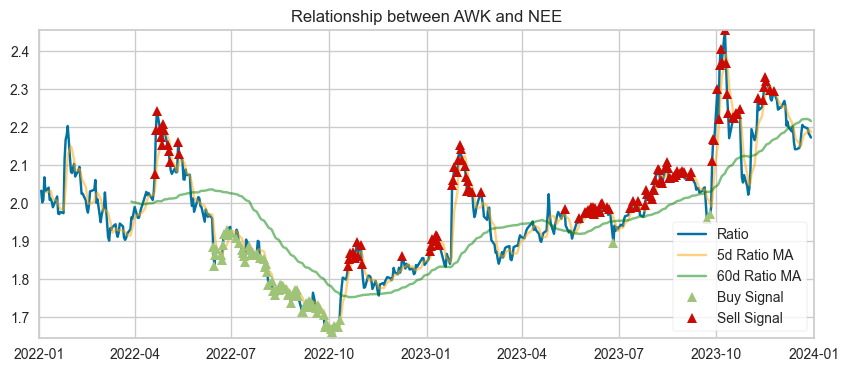

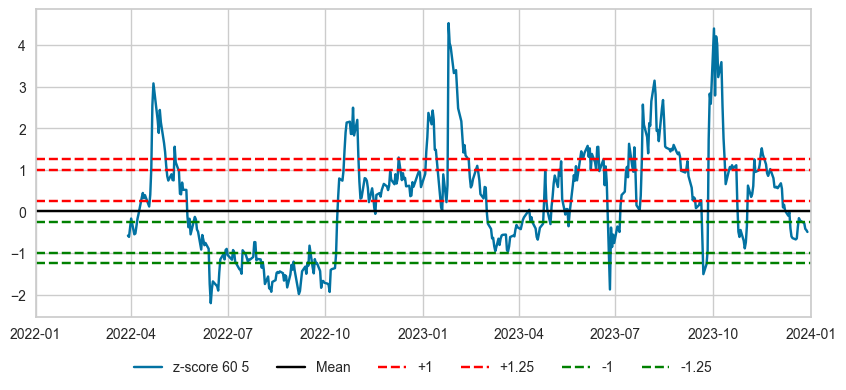

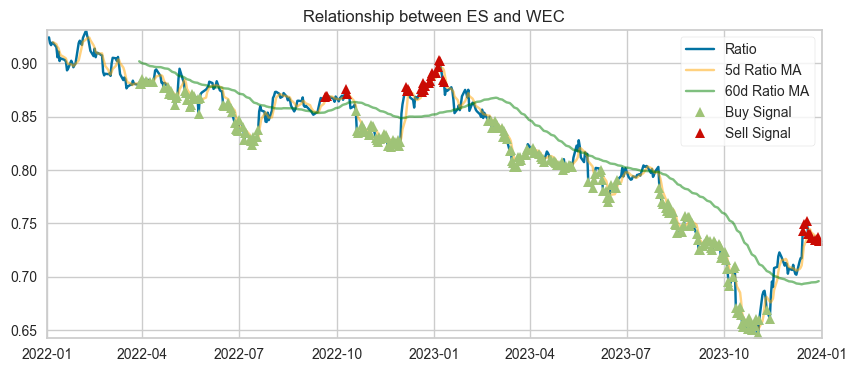

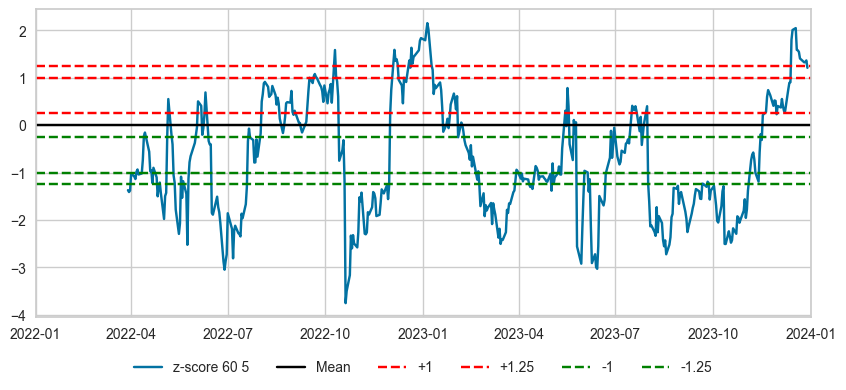

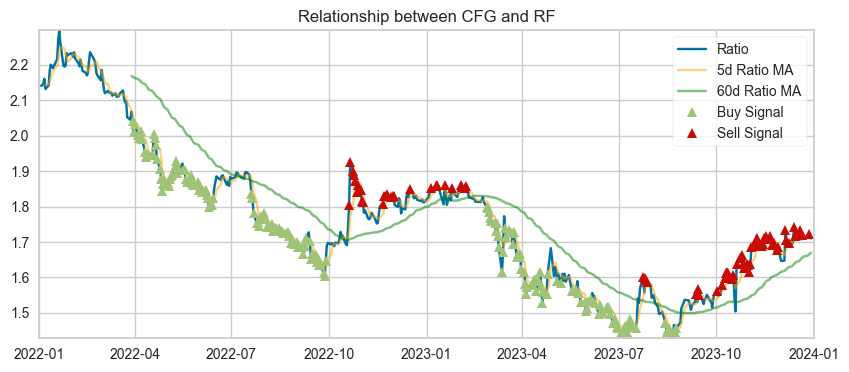

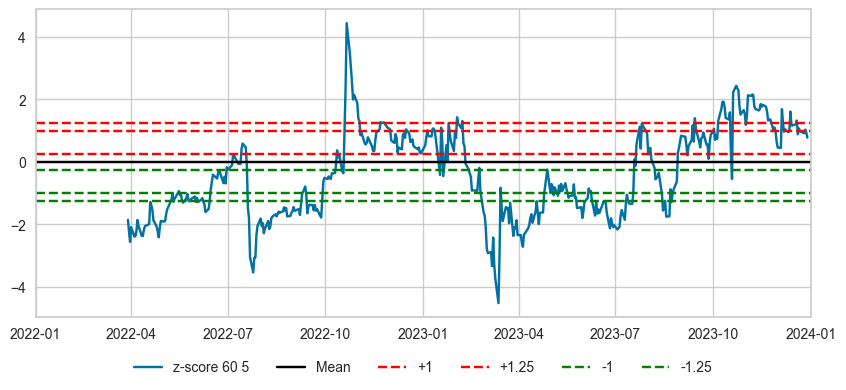

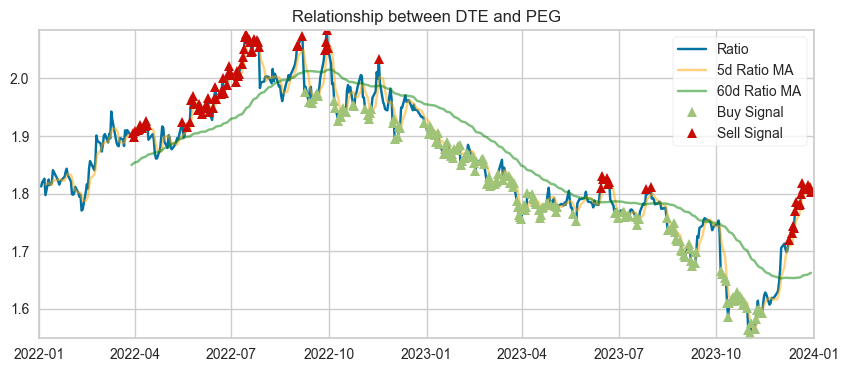

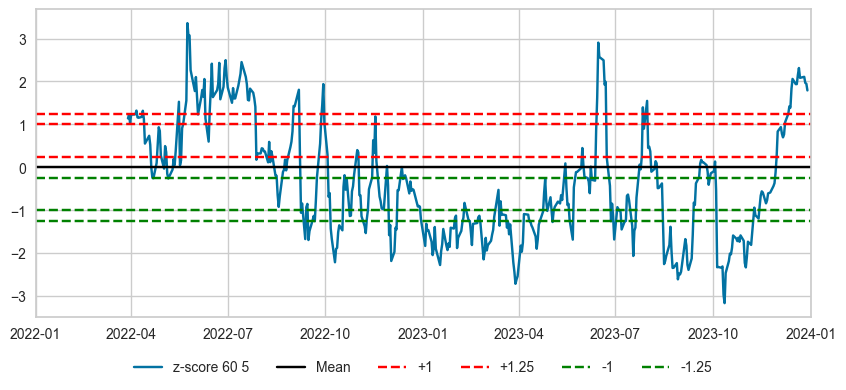

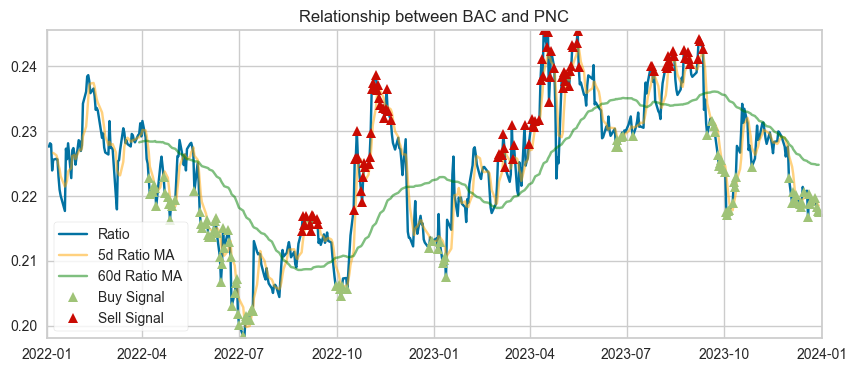

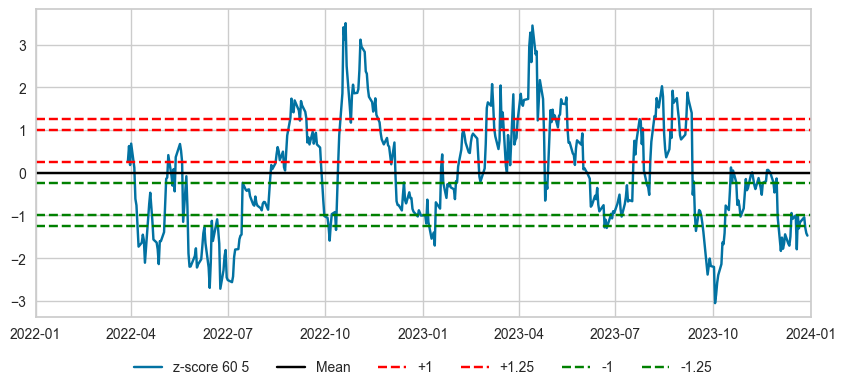

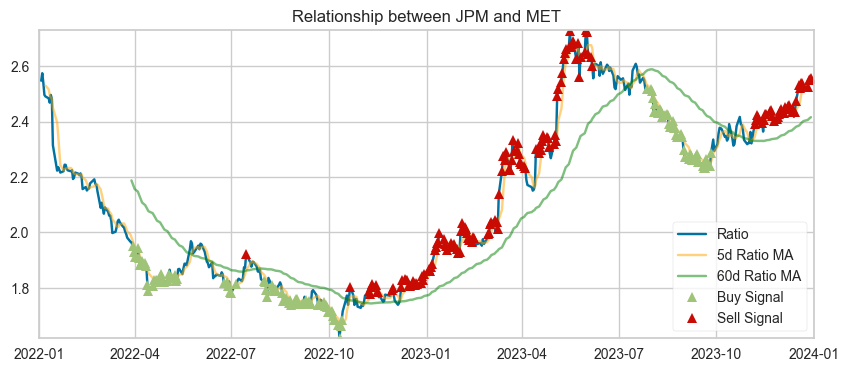

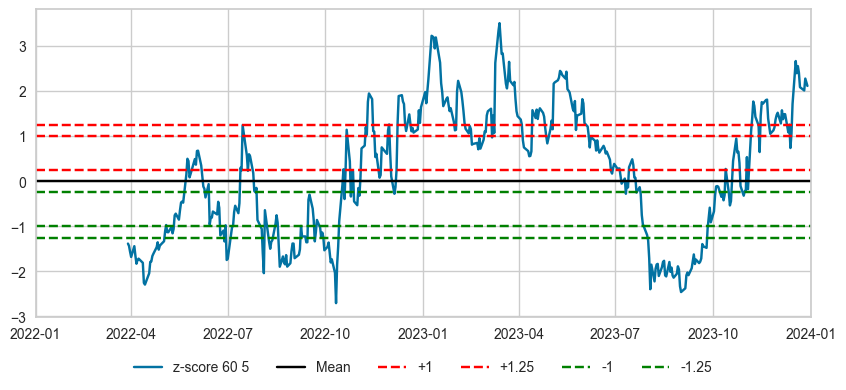

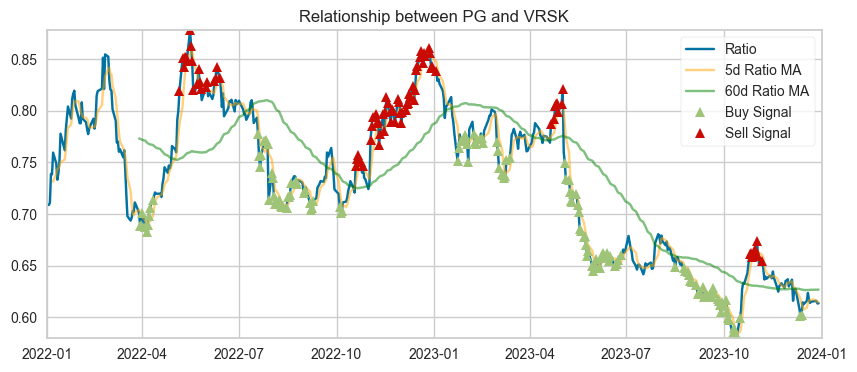

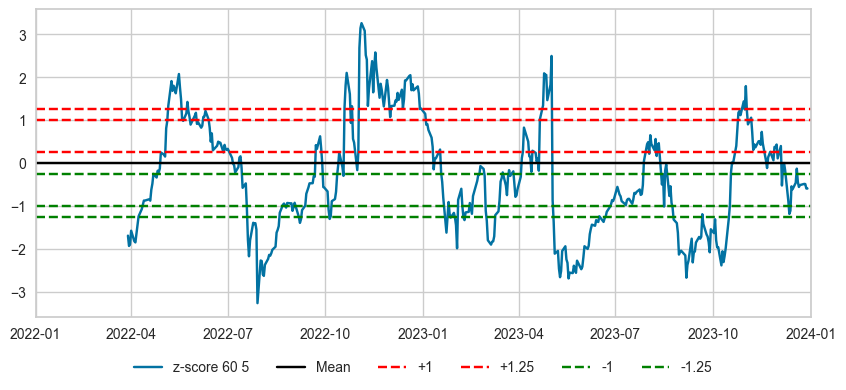

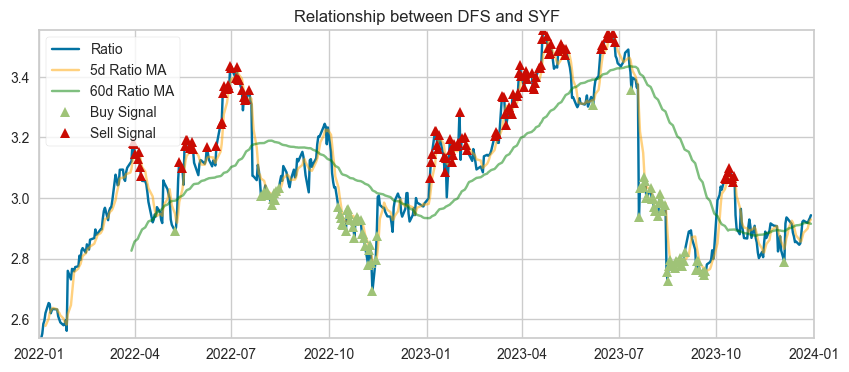

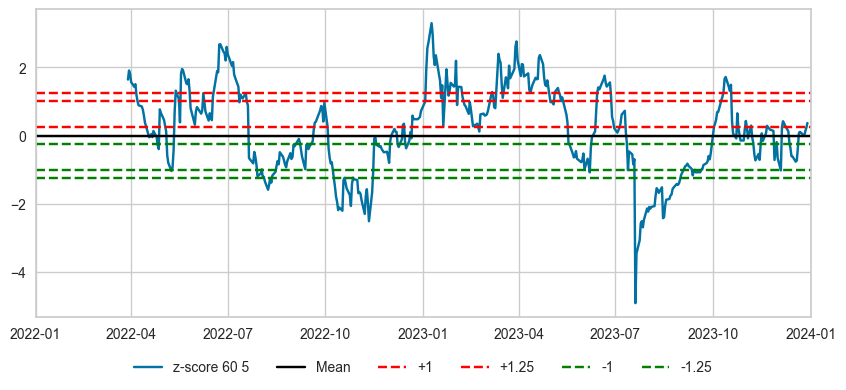

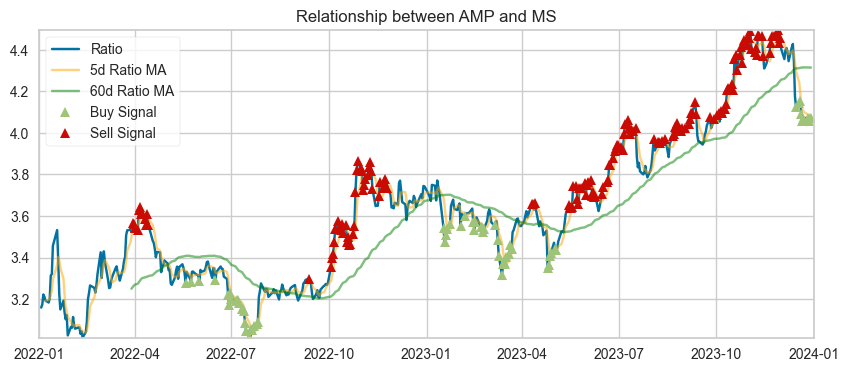

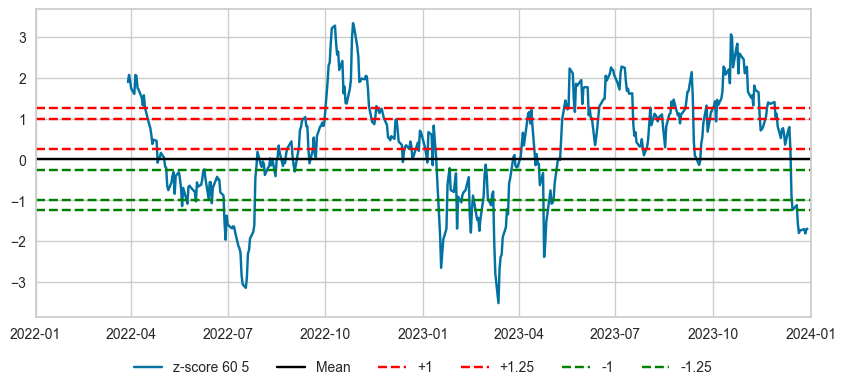

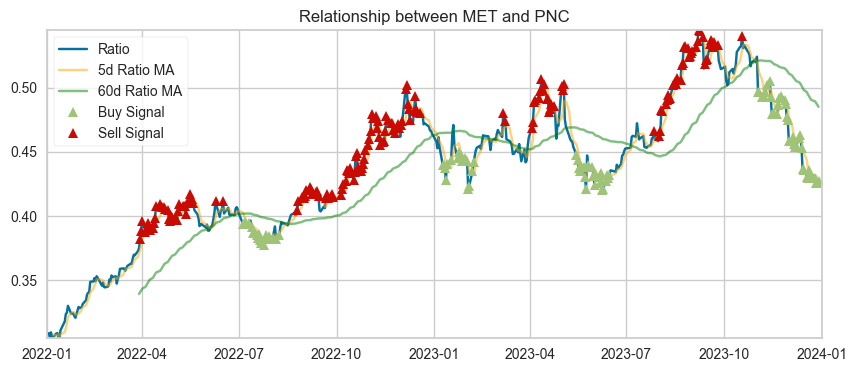

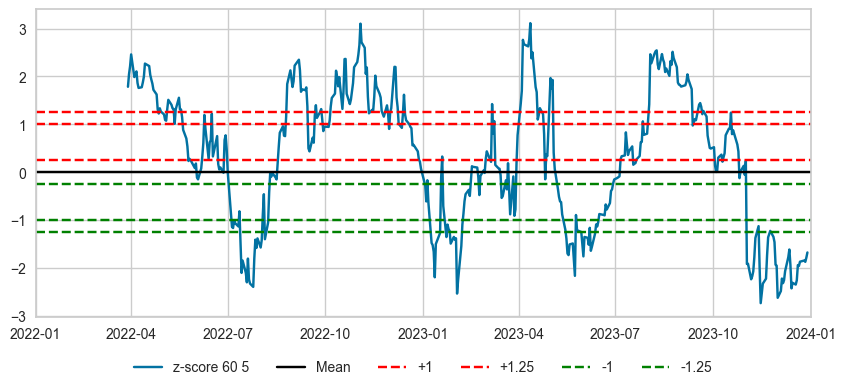

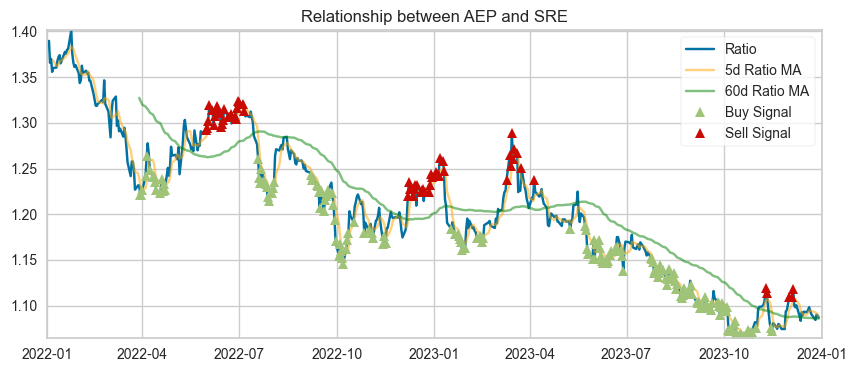

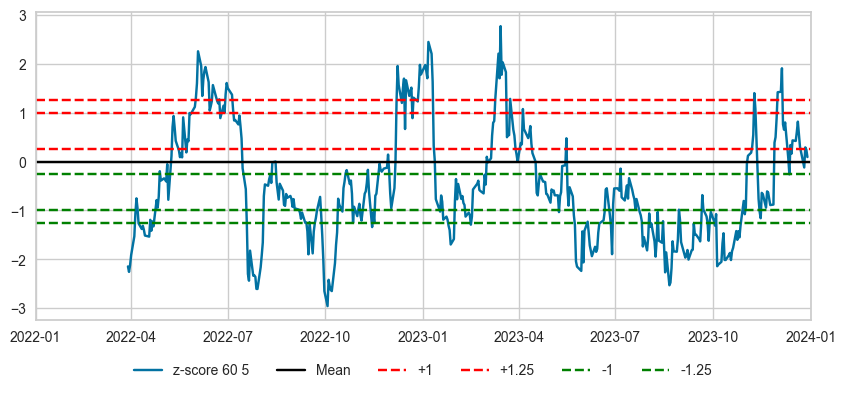

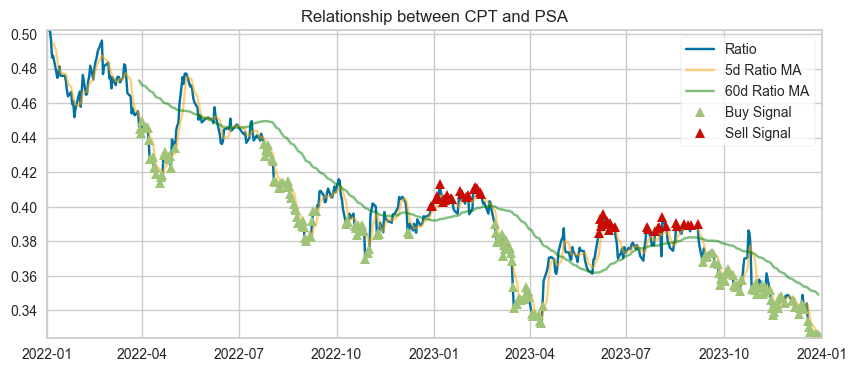

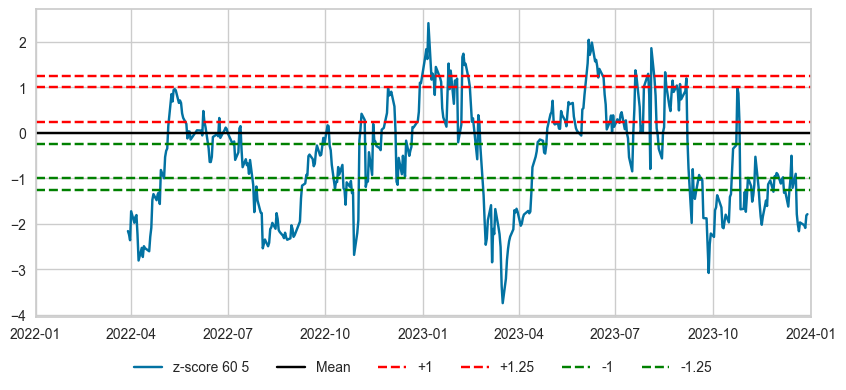

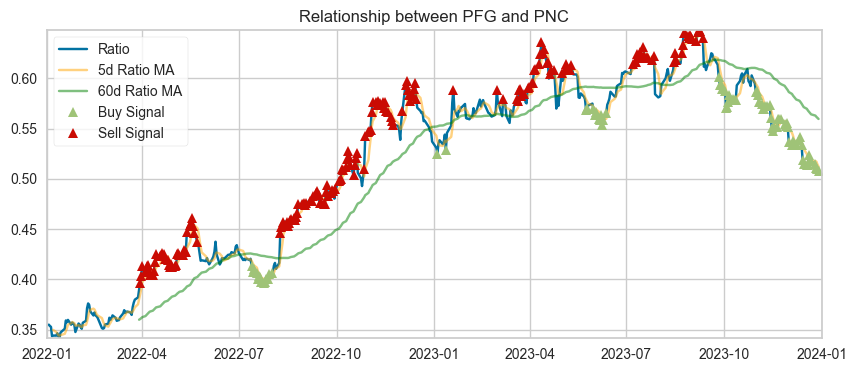

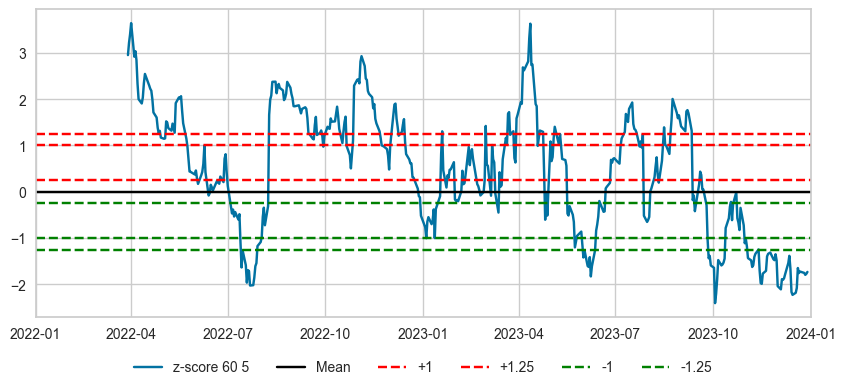

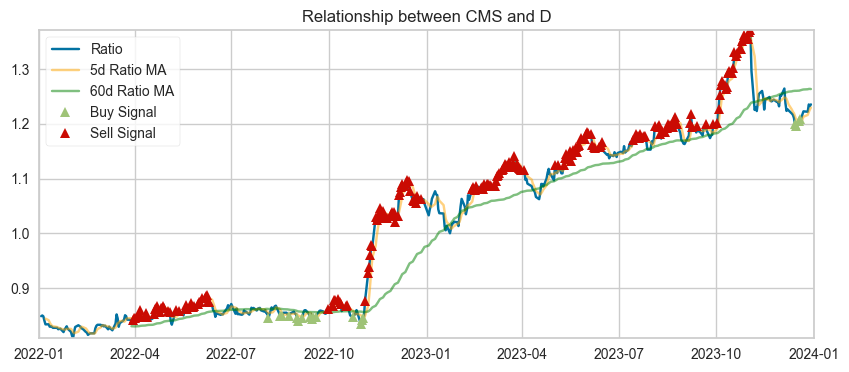

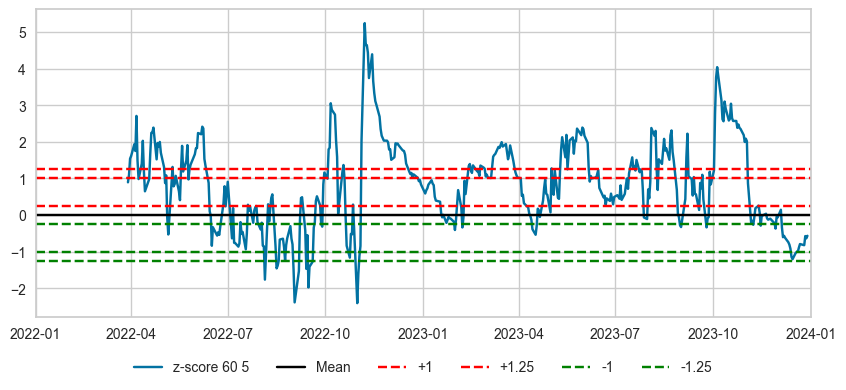

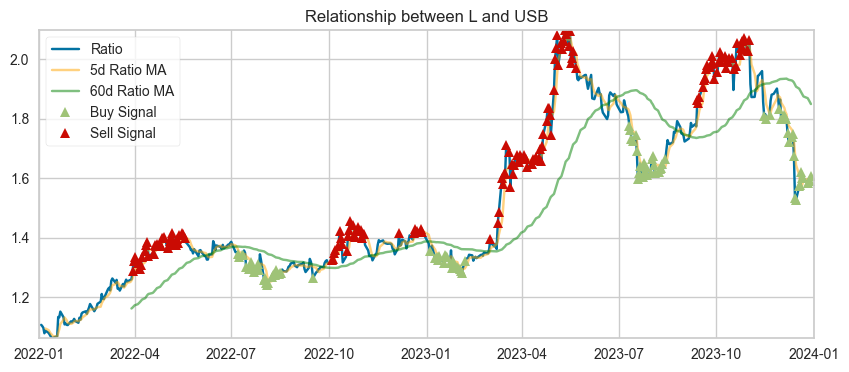

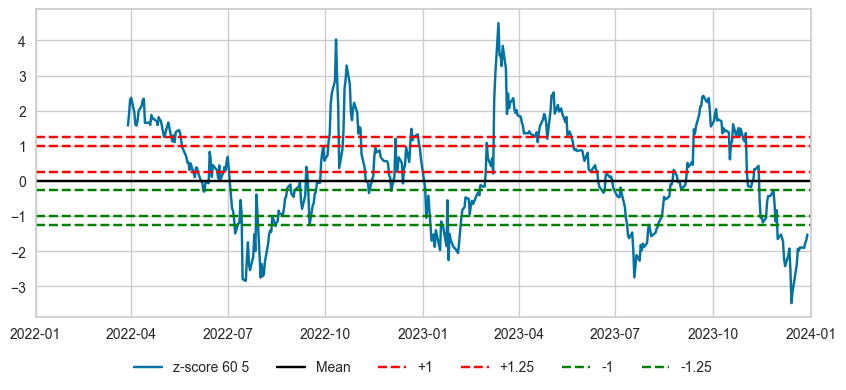

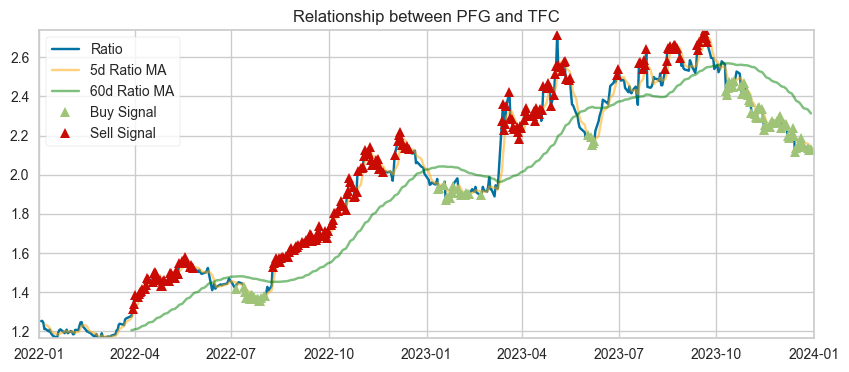

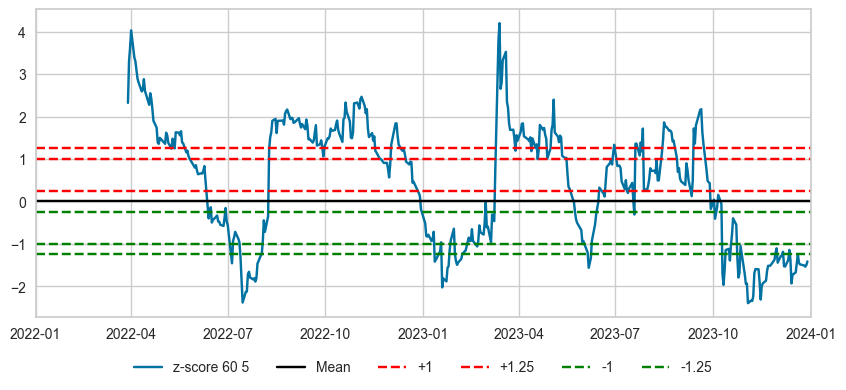

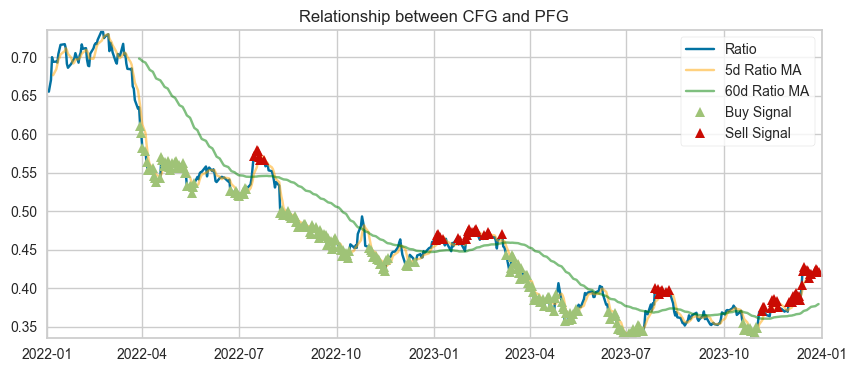

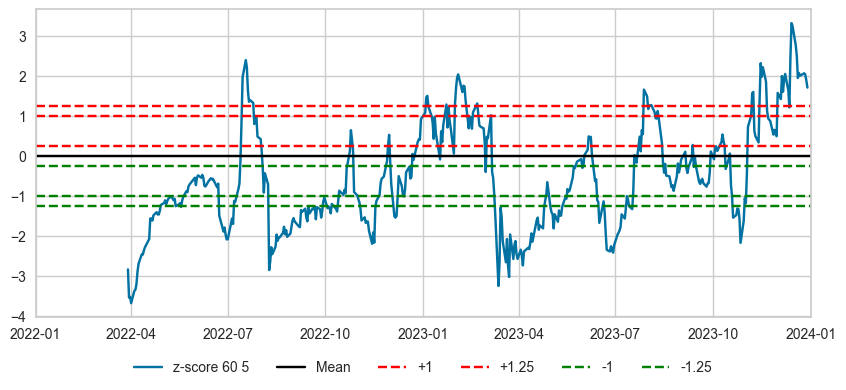

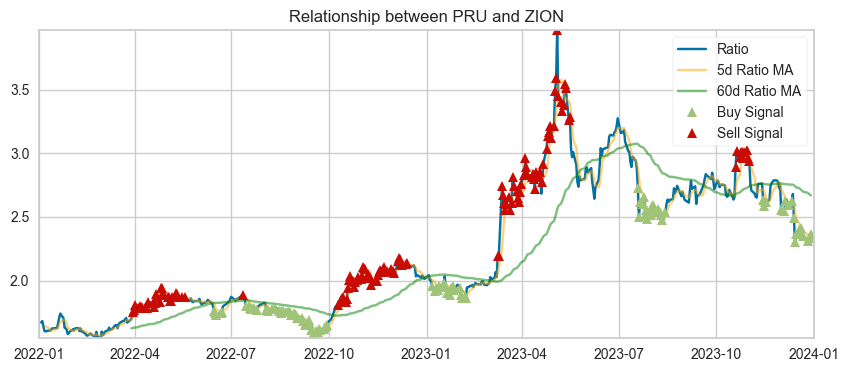

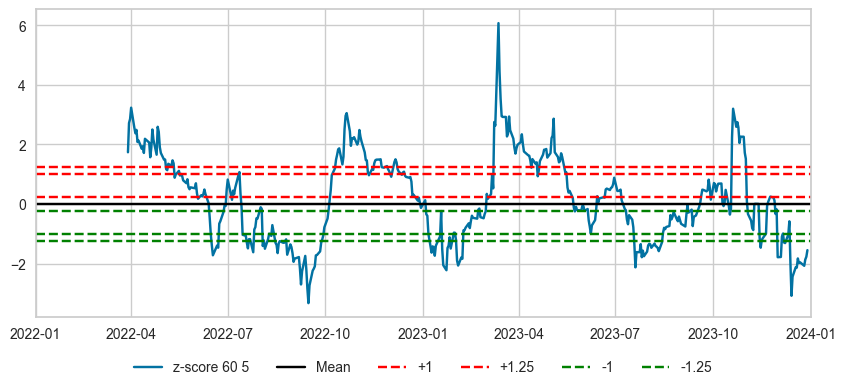

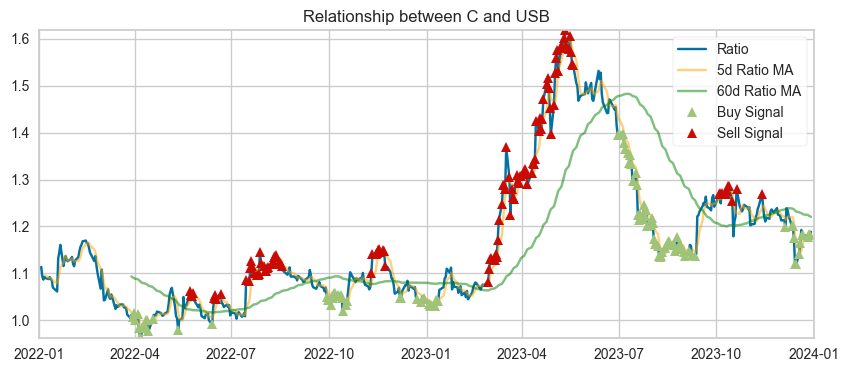

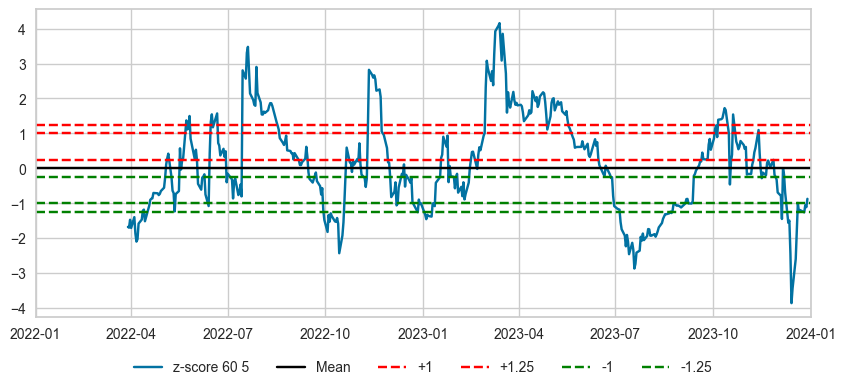

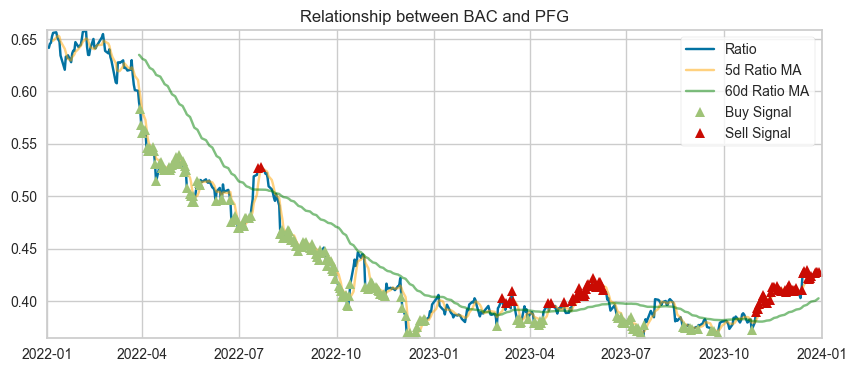

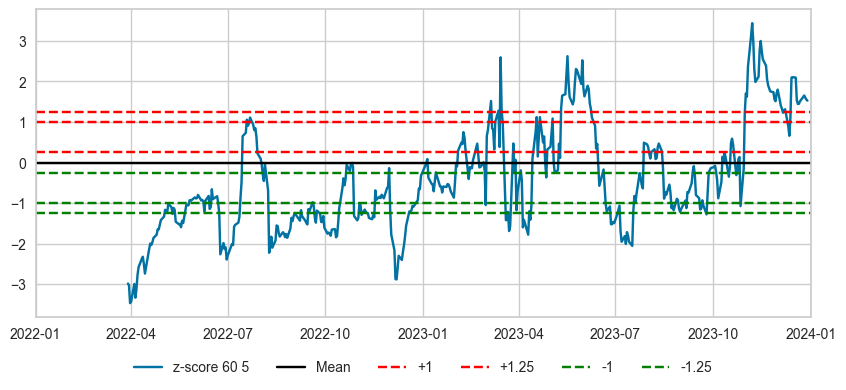

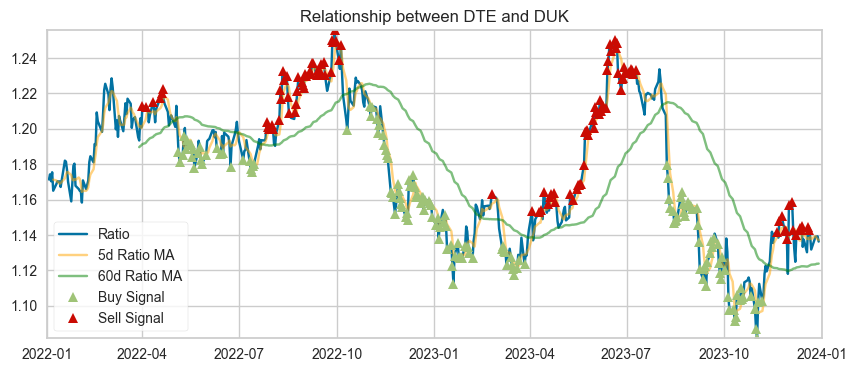

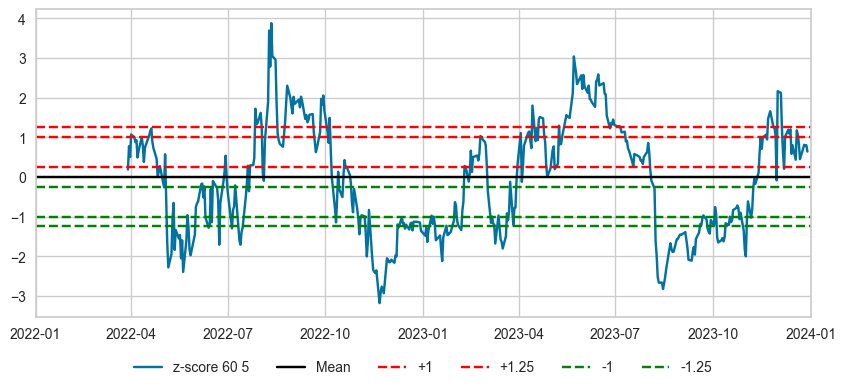

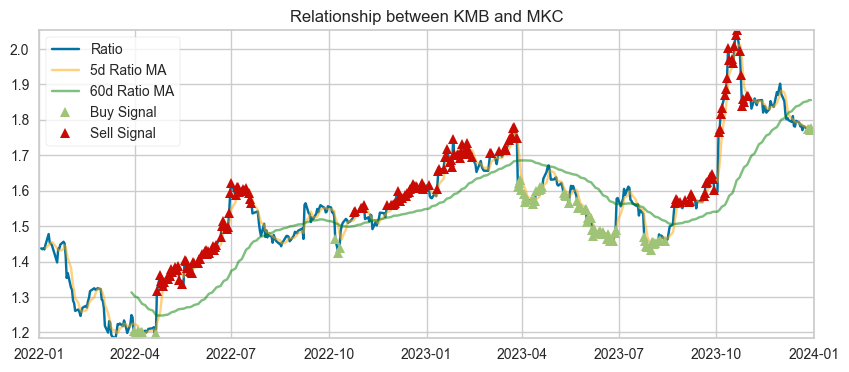

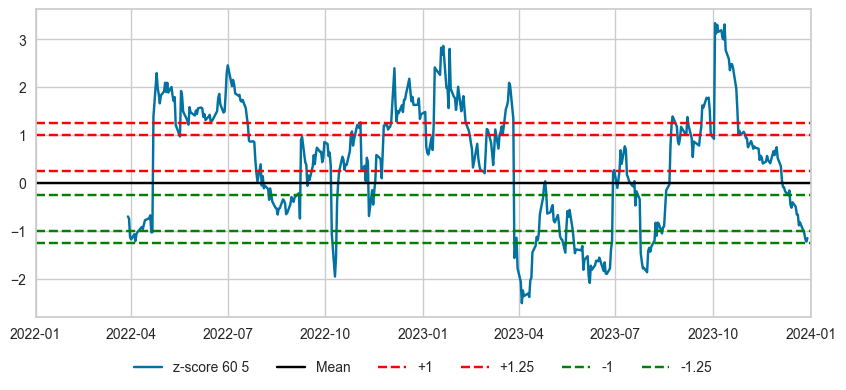

In [6]:
for pair in top_10_pairs:
    # Cointgration test
    stock_1 = stock_df_top_pairs[pair[0]]
    stock_2 = stock_df_top_pairs[pair[1]]
    result = ts.coint(stock_1, stock_2)
    
    ratio = stock_1 / stock_2


    # Create a signals
    ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
    ratios_mavg60 = ratio.rolling(window=60, center=False).mean()

    std_60 = ratio.rolling(window=60, center=False).std()
    zscore_60_5 = (ratio - ratios_mavg60)/std_60

    plt.figure(figsize=(10, 4))
    plt.plot(ratio)
    plt.plot(ratios_mavg5, c = 'orange', alpha = 0.5)
    plt.plot(ratios_mavg60, c = 'green', alpha = 0.5)
    buy = ratio.copy()
    sell = ratio.copy()
    buy[:60]= np.nan
    sell[:60]= np.nan
    buy[zscore_60_5>-1] = np.nan
    sell[zscore_60_5<1] = np.nan

    plt.plot(buy, color='g', linestyle='None', marker='^')
    plt.plot(sell, color='r', linestyle='None', marker='^')

    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, ratio.min(), ratio.max()))
    legend = plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA', 'Buy Signal', 'Sell Signal'], frameon=True, facecolor='white')
    plt.title(f'Relationship between {pair[0]} and {pair[1]}')
    plt.xlim(datetime(2022,1,1),datetime(2024,1,1))
    plt.show()


    plt.figure(figsize=(10, 4))
    plt.plot(zscore_60_5)
    plt.axhline(0, color='black')
    plt.axhline(1, color='red', linestyle='--')
    plt.axhline(1.25, color='red', linestyle='--')
    plt.axhline(-1, color='green', linestyle='--')
    plt.axhline(-1.25, color='green', linestyle='--')
    plt.axhline(0.25, color='red', linestyle='--')
    plt.axhline(-0.25, color='green', linestyle='--')
    plt.xlim(datetime(2022,1,1),datetime(2024,1,1))
    plt.legend(['z-score 60 5', 'Mean', '+1','+1.25','-1','-1.25'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)
    plt.show()

In [7]:
trading_pairs = top_10_pairs.copy()
print(top_10_pairs)
print(trading_pairs)

[('AWK', 'NEE', 0.9868568115394872, 0.0021702962443593287, 0.8875227705044594, 0.00047915622637524516), ('ES', 'WEC', 0.9805179496276685, 0.0024463386112988073, 0.004369302557719054, 0.000846420301143742), ('CFG', 'RF', 0.9823147370618126, 0.013898508852412044, 0.5308970589810956, 0.0006392880800180128), ('DTE', 'PEG', 0.9673594718837637, 0.000884376996238171, 0.30832315414754896, 0.0002929419642600224), ('BAC', 'PNC', 0.984833159363554, 0.01739329281857443, 0.9154282930625082, 0.0015347259844459083), ('JPM', 'MET', 0.9685020620718218, 0.013915696687478907, 0.7826663417194497, 0.004255041314239258), ('PG', 'VRSK', 0.9645913152752947, 0.013567439644299777, 0.10223656125072028, 0.0019124531142389804), ('DFS', 'SYF', 0.9783016734527809, 0.01593526422457463, 0.824149846284554, 0.015336254177062974), ('AMP', 'MS', 0.9793277646520188, 0.027406236571223118, 0.9542769139825512, 0.014415377437221462), ('MET', 'PNC', 0.9690950745827942, 0.028273687948501807, 0.8872240116385294, 0.005260412110338

In [39]:
# Trading strategy
total_profit = 0
total_trade_vol = 0
total_order_fees = 0
transaction_list = []
trade_profit_list = []
trade_list = pd.DataFrame(columns=['StartDate','LongStock','LongStartPrice','ShortStock','ShortStartPrice','Status','ClosingDate','LongClosingPrice','ShortClosingPrice','ClosingCount'])
number_of_trading_days = len(zscore_60_5) - 1
for pair in trading_pairs:
    # Cointgration test
    stock_1 = stock_df_top_pairs[pair[0]]
    stock_2 = stock_df_top_pairs[pair[1]]
    result = ts.coint(stock_1, stock_2)
    ratio = stock_1 / stock_2

    # Create a signals
    ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
    ratios_mavg60 = ratio.rolling(window=60, center=False).mean()

    std_60 = ratio.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60


    # only trade pairs with p-value < 0.05
    trade_volume = 1000
    first_trade_day = 0 
    quant_1, quant_2 = 0, 0
    spec_amount_1, spec_amount_2 = 0, 0
    not_invested_1, not_invested_2 = 0, 0
    trade_sum = 0
    profit = 0
    trade_profit = 0
    # buy signals
    for day, zscore_value in enumerate(zscore_60_5):    
        if zscore_value < -1 and first_trade_day == 0: # long stock_1 and short stock_2 + get first trading day
            quant_1 += (trade_volume/2) // stock_1.iloc[day]
            spec_amount_1 = ((trade_volume/2) // stock_1.iloc[day]) * stock_1.iloc[day]
            quant_2 += - (trade_volume/2) // stock_2.iloc[day]
            spec_amount_2 = ((trade_volume/2) // stock_2.iloc[day]) * stock_2.iloc[day]
            if ((trade_volume/2) // stock_1.iloc[day]) > 0: # Order fees
                not_invested_1 -= spec_amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += spec_amount_1 * 0.0025 + 7.5
            if ((trade_volume/2) // stock_2.iloc[day]) > 0: # Order fees
                not_invested_2 -= spec_amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += spec_amount_2 * 0.0025 + 7.5
            not_invested_1 += trade_volume % stock_1.iloc[day]
            not_invested_2 += trade_volume % stock_2.iloc[day]
            trade_sum += trade_volume
            first_trade_day = day
            total_trade_vol += trade_volume
            transaction_list.append((first_trade_day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day]))
            new_row = pd.DataFrame({'StartDate':[first_trade_day],'LongStock':[pair[0]],'LongStartPrice':[stock_1.iloc[day]],'ShortStock':[pair[1]],
                                    'ShortStartPrice':[stock_2.iloc[day]],'Status':['open'],'ClosingDate':['open'],'LongClosingPrice':['open'],'ShortClosingPrice':['open'],'ClosingCount':[0]})
            trade_list = pd.concat([trade_list, new_row], ignore_index=True)
            continue
            #list.append('day + quant1, quant2, stock_1.iloc, tradesum etc.') # Bei Verkauf dann auch stock_1.iloc und day etc. und Rendite berechnen wenn es geht
            #print(first_trade_day)
            #print(quant_1, trade_sum, zscore_value, day)

        if zscore_value < -1: # long stock_1 and short stock_2
            quant_1 += (trade_volume/2) // stock_1.iloc[day]
            spec_amount_1 = ((trade_volume/2) // stock_1.iloc[day]) * stock_1.iloc[day]
            quant_2 += - (trade_volume/2) // stock_2.iloc[day]
            spec_amount_2 = ((trade_volume/2) // stock_2.iloc[day]) * stock_2.iloc[day]
            if ((trade_volume/2) // stock_1.iloc[day]) > 0: # Order fees
                not_invested_1 -= spec_amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += spec_amount_1 * 0.0025 + 7.5
            if ((trade_volume/2) // stock_2.iloc[day]) > 0: # Order fees
                not_invested_2 -= spec_amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += spec_amount_2 * 0.0025 + 7.5
            not_invested_1 += trade_volume % stock_1.iloc[day]
            not_invested_2 += trade_volume % stock_2.iloc[day]
            trade_sum += trade_volume
            total_trade_vol += trade_volume
            new_row = pd.DataFrame({'StartDate':[day],'LongStock':[pair[0]],'LongStartPrice':[stock_1.iloc[day]],'ShortStock':[pair[1]],
                                    'ShortStartPrice':[stock_2.iloc[day]],'Status':['open'],'ClosingDate':['open'],'LongClosingPrice':['open'],'ShortClosingPrice':['open'],'ClosingCount':[0]})
            trade_list = pd.concat([trade_list, new_row], ignore_index=True)
            #print(quant_1, trade_sum, zscore_value, day)

        if zscore_value > 1: # close trades
            amount_1 = quant_1 * stock_1.iloc[day]
            amount_2 = - quant_2 * stock_2.iloc[day]
            if quant_1 > 0: # Order fees
                not_invested_1 -= amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
            if quant_2 < 0: # Order fees, quant_2 < 0 because we are shorting stock_2
                not_invested_2 -= amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees

            trade_profit = amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum
            profit += amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum

            if quant_1 > 0 or quant_2 < 0: # Append closed trade to list
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'ClosingDate']= day
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'LongClosingPrice']= stock_1.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'ShortClosingPrice']= stock_2.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'Status'] = 'closed'
                transaction_list.append((day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day], trade_sum, trade_profit, profit))
                trade_profit_list.append((trade_sum, trade_profit))

            # reset values for building up next trade
            quant_1 = 0
            quant_2 = 0
            spec_amount_1 = 0
            spec_amount_2 = 0
            not_invested_1 = 0
            not_invested_2 = 0
            first_trade_day = 0
            trade_sum = 0
            trade_profit = 0
        
        if zscore_value < -5: # close trades, because z-score is to big and correlation doesnt seem to exist anymore -> risk management
            amount_1 = quant_1 * stock_1.iloc[day]
            amount_2 = - quant_2 * stock_2.iloc[day]
            if quant_1 > 0: # Order fees
                not_invested_1 -= amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
            if quant_2 < 0: # Order fees, quant_2 < 0 because we are shorting stock_2
                not_invested_2 -= amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees

            trade_profit = amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum
            profit += amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum

            if quant_1 > 0 or quant_2 < 0: # Append closed trade to list
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'ClosingDate']= day
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'LongClosingPrice']= stock_1.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'ShortClosingPrice']= stock_2.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'Status'] = 'closed'
                transaction_list.append((day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day], trade_sum, trade_profit, profit))
                trade_profit_list.append((trade_sum, trade_profit))

            print("risk mgmt, buy, z-score is to big, the pair", pair[0], "&", pair[1], "will be removed. The profit before removal is:")
            trading_pairs.remove(pair)
            break

        expiration_day = first_trade_day + 252 # change value for max. holding period of one week, month or quarter 
        if day == expiration_day and zscore_value < -1 : # close trades because it will take more than half a year since first trade to close z-score gap -> risk management to protect against potential loss of correlation 
            amount_1 = quant_1 * stock_1.iloc[day]
            amount_2 = - quant_2 * stock_2.iloc[day]
            if quant_1 > 0: # Order fees 
                not_invested_1 -= amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
            if quant_2 < 0: # Order fees, quant_2 < 0 because we are shorting stock_2
                not_invested_2 -= amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees

            trade_profit = amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum
            profit += amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum

            if quant_1 > 0 or quant_2 < 0: # Append closed trade to list
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'ClosingDate']= day
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'LongClosingPrice']= stock_1.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'ShortClosingPrice']= stock_2.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'Status'] = 'closed'
                transaction_list.append((day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day], trade_sum, trade_profit, profit))
                trade_profit_list.append((trade_sum, trade_profit))

            print("risk mgmt, buy, max. holding period, the pair", pair[0], "&", pair[1], "will be removed. The profit before removal is:")
            trading_pairs.remove(pair)
            break

        """if day == number_of_trading_days: # close open trades on the last day
            amount_1 = quant_1 * stock_1.iloc[day]
            amount_2 = - quant_2 * stock_2.iloc[day]
            if quant_1 > 0: # Order fees
                not_invested_1 -= amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
            if quant_2 < 0: # Order fees, quant_2 < 0 because we are shorting stock_2
                not_invested_2 -= amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees

            trade_profit = amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum
            profit += amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum

            if quant_1 > 0 or quant_2 < 0: # Append closed trade to list
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'ClosingDate']= day
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'LongClosingPrice']= stock_1.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'ShortClosingPrice']= stock_2.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['Status'] == 'open'), 'Status'] = 'closed'
                transaction_list.append((day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day], trade_sum, trade_profit, profit))
                trade_profit_list.append((trade_sum, trade_profit))"""

    # reset values for sell signals
    first_trade_day = 0 
    quant_1, quant_2 = 0, 0
    spec_amount_1, spec_amount_2 = 0, 0
    not_invested_1, not_invested_2 = 0, 0
    trade_sum = 0
    trade_profit = 0
    # sell signals
    for day, zscore_value in enumerate(zscore_60_5):    
        if zscore_value > 1 and first_trade_day == 0: # short stock_1 and long stock_2 + get first trading day
            quant_1 += - (trade_volume/2) // stock_1.iloc[day]
            spec_amount_1 = ((trade_volume/2) // stock_1.iloc[day]) * stock_1.iloc[day]
            quant_2 += (trade_volume/2) // stock_2.iloc[day]
            spec_amount_2 = ((trade_volume/2) // stock_2.iloc[day]) * stock_2.iloc[day]
            if ((trade_volume/2) // stock_1.iloc[day]) > 0: # Order fees
                not_invested_1 -= spec_amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += spec_amount_1 * 0.0025 + 7.5
            if ((trade_volume/2) // stock_2.iloc[day]) > 0: # Order fees
                not_invested_2 -= spec_amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += spec_amount_2 * 0.0025 + 7.5
            not_invested_1 += trade_volume % stock_1.iloc[day]
            not_invested_2 += trade_volume % stock_2.iloc[day]
            trade_sum += trade_volume
            first_trade_day = day
            total_trade_vol += trade_volume
            transaction_list.append((first_trade_day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day]))
            new_row = pd.DataFrame({'StartDate':[day],'LongStock':[pair[1]],'LongStartPrice':[stock_2.iloc[day]],'ShortStock':[pair[0]],
                                    'ShortStartPrice':[stock_1.iloc[day]],'Status':['open'],'ClosingDate':['open'],'LongClosingPrice':['open'],'ShortClosingPrice':['open'],'ClosingCount':[0]})
            trade_list = pd.concat([trade_list, new_row], ignore_index=True)
            continue
            #print(first_trade_day)
            #print(quant_1, trade_sum, zscore_value, day)

        if zscore_value > 1: # short stock_1 and long stock_2
            quant_1 += - (trade_volume/2) // stock_1.iloc[day]
            spec_amount_1 = ((trade_volume/2) // stock_1.iloc[day]) * stock_1.iloc[day]
            quant_2 += (trade_volume/2) // stock_2.iloc[day]
            spec_amount_2 = ((trade_volume/2) // stock_2.iloc[day]) * stock_2.iloc[day]
            if ((trade_volume/2) // stock_1.iloc[day]) > 0: # Order fees
                not_invested_1 -= spec_amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += spec_amount_1 * 0.0025 + 7.5
            if ((trade_volume/2) // stock_2.iloc[day]) > 0: # Order fees
                not_invested_2 -= spec_amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += spec_amount_2 * 0.0025 + 7.5
            not_invested_1 += trade_volume % stock_1.iloc[day]
            not_invested_2 += trade_volume % stock_2.iloc[day]
            trade_sum += trade_volume
            total_trade_vol += trade_volume
            new_row = pd.DataFrame({'StartDate':[day],'LongStock':[pair[1]],'LongStartPrice':[stock_2.iloc[day]],'ShortStock':[pair[0]],
                                    'ShortStartPrice':[stock_1.iloc[day]],'Status':['open'],'ClosingDate':['open'],'LongClosingPrice':['open'],'ShortClosingPrice':['open'],'ClosingCount':[0]})
            trade_list = pd.concat([trade_list, new_row], ignore_index=True)
            #print(quant_1, trade_sum, zscore_value, day)

        if zscore_value < -1: # close trades
            amount_1 = - quant_1 * stock_1.iloc[day]
            amount_2 = quant_2 * stock_2.iloc[day]
            if quant_1 < 0: # Order fees, quant_1 < 0 because we are shorting stock_1
                not_invested_1 -= amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
            if quant_2 > 0: # Order fees
                not_invested_2 -= amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees

            trade_profit = amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum                
            profit += amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum

            if quant_2 > 0 or quant_1 < 0: # Append closed trade to list
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'ClosingDate']= day
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'LongClosingPrice']= stock_2.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'ShortClosingPrice']= stock_1.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'Status'] = 'closed'
                transaction_list.append((day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day], trade_sum, trade_profit, profit))
                trade_profit_list.append((trade_sum, trade_profit))

            # reset values for building up next trade
            quant_1 = 0
            quant_2 = 0
            spec_amount_1 = 0
            spec_amount_2 = 0
            not_invested_1 = 0
            not_invested_2 = 0
            first_trade_day = 0
            trade_sum = 0
            trade_profit = 0
        
        if zscore_value > 5: # close trades, because z-score is to big and correlation doesnt seem to exist anymore
            amount_1 = - quant_1 * stock_1.iloc[day]
            amount_2 = quant_2 * stock_2.iloc[day]
            if quant_1 < 0: # Order fees, quant_1 < 0 because we are shorting stock_1
                not_invested_1 -= amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
            if quant_2 > 0: # Order fees
                not_invested_2 -= amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees

            trade_profit = amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum 
            profit += amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum

            if quant_2 > 0 or quant_1 < 0: # Append closed trade to list
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'ClosingDate']= day
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'LongClosingPrice']= stock_2.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'ShortClosingPrice']= stock_1.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'Status'] = 'closed'
                transaction_list.append((day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day], trade_sum, trade_profit, profit))
                trade_profit_list.append((trade_sum, trade_profit))
            
            print("risk mgmt, sell, z-score is to big, the pair", pair[0], "&", pair[1], "will be removed. The profit before removal is:")
            trading_pairs.remove(pair)
            break

        expiration_day = first_trade_day + 252 # change value for max. holding period of one week, month or quarter 
        if day == expiration_day and zscore_value > 1 : # close trades, since it took more than half a year since first trade to close z-score gap -> risk management to protect against potential loss of correlation 
            amount_1 = - quant_1 * stock_1.iloc[day]
            amount_2 = quant_2 * stock_2.iloc[day]
            if quant_1 < 0: # Order fees, quant_1 < 0 because we are shorting stock_1
                not_invested_1 -= amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
            if quant_2 > 0: # Order fees
                not_invested_2 -= amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees

            trade_profit = amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum
            profit += amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum

            if quant_2 > 0 or quant_1 < 0: # Append closed trade to list
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'ClosingDate']= day
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'LongClosingPrice']= stock_2.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'ShortClosingPrice']= stock_1.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'Status'] = 'closed'
                transaction_list.append((day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day], trade_sum, trade_profit, profit))
                trade_profit_list.append((trade_sum, trade_profit))
            
            print("risk mgmt, sell, max. holding period, the pair", pair[0], "&", pair[1], "will be removed. The profit before removal is:")
            trading_pairs.remove(pair)
            break

        """if day == number_of_trading_days: # close open trades on the last day
            amount_1 = - quant_1 * stock_1.iloc[day]
            amount_2 = quant_2 * stock_2.iloc[day]
            if quant_1 < 0: # Order fees, quant_1 < 0 because we are shorting stock_1
                not_invested_1 -= amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_1 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
            if quant_2 > 0: # Order fees
                not_invested_2 -= amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees
                total_order_fees += amount_2 * 0.0025 + 7.5 # assume 7.50 + 0.25% order fees

            trade_profit = amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum
            profit += amount_1 + amount_2 + not_invested_1 + not_invested_2 - trade_sum

            if quant_2 > 0 or quant_1 < 0: # Append closed trade to list
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'ClosingDate']= day
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'LongClosingPrice']= stock_2.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'ShortClosingPrice']= stock_1.iloc[day]
                trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['Status'] == 'open'), 'Status'] = 'closed'
                transaction_list.append((day, pair[0], stock_1.iloc[day], pair[1], stock_2.iloc[day], trade_sum, trade_profit, profit))
                trade_profit_list.append((trade_sum, trade_profit))"""

total_profit += profit
total_profit_after_tax = total_profit * 0.73625 # 26.375% capital gains tax & solidarity surcharge

print("Stock 1:", pair[0], "| Stock 2:", pair[1], "| Profit in Dollar before taxes:", round(profit,2))
print("Total profit in Dollar after taxes:", round(total_profit_after_tax,2))
print("Total order fees:", round(total_order_fees,2))
print("Total trade volume:", total_trade_vol)
#transaction_list
#trade_profit_list
    

Stock 1: KMB | Stock 2: MKC | Profit in Dollar before taxes: 18341.63
Total profit in Dollar after taxes: 13504.03
Total order fees: 100688.34
Total trade volume: 5074000


In [43]:
trade_list = trade_list[trade_list['StartDate']!= trade_list['ClosingDate']]
trade_list = trade_list[trade_list['Status']=='closed']
trade_list.reset_index(inplace=True,drop=True)


for pair in top_10_pairs:
    for day, zscore_value in enumerate(zscore_60_5):
        trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['ClosingDate'] == day), 'ClosingCount']=trade_list.loc[(trade_list['LongStock'] == pair[1]) & (trade_list['ShortStock'] == pair[0]) & (trade_list['ClosingDate'] == day)].shape[0]
        trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['ClosingDate'] == day), 'ClosingCount']=trade_list.loc[(trade_list['LongStock'] == pair[0]) & (trade_list['ShortStock'] == pair[1]) & (trade_list['ClosingDate'] == day)].shape[0]
trade_list

,StartDate,LongStock,LongStartPrice,ShortStock,ShortStartPrice,Status,ClosingDate,LongClosingPrice,ShortClosingPrice,ClosingCount
0,59,AWK,159.091568,NEE,81.023781,closed,76,158.85936,70.807236,1
1,113,AWK,131.205215,NEE,71.441650,closed,201,126.792618,68.353065,76
2,114,AWK,127.182175,NEE,68.244652,closed,201,126.792618,68.353065,76
3,115,AWK,128.115021,NEE,68.186874,closed,201,126.792618,68.353065,76
4,116,AWK,130.641586,NEE,70.035744,closed,201,126.792618,68.353065,76
...,...,...,...,...,...,...,...,...,...,...
4469,454,MKC,61.916389,KMB,119.338791,closed,498,67.790001,120.309998,33
4470,455,MKC,63.983582,KMB,117.635368,closed,498,67.790001,120.309998,33
4471,456,MKC,64.033272,KMB,119.011971,closed,498,67.790001,120.309998,33
4472,457,MKC,62.592201,KMB,115.733871,closed,498,67.790001,120.309998,33


In [45]:

trade_volume = 500
orderfeeabs = 1
taxes = 0.26375
trade_list['GrossProfit'] = (trade_volume/trade_list['LongStartPrice'])*(trade_list['LongClosingPrice']-trade_list['LongStartPrice'])+ (trade_volume/trade_list['ShortStartPrice'])*(trade_list['ShortStartPrice']-trade_list['ShortClosingPrice'])
trade_list['NetProfit'] = (trade_list['GrossProfit']  - (2+2/trade_list['ClosingCount'])*orderfeeabs)*(1-taxes)
trade_list['ReturnRate'] = trade_list['NetProfit']/trade_volume/2
trade_list['ReturnRatePA'] = trade_list['ReturnRate']*252/(trade_list['ClosingDate']-trade_list['StartDate'])
total_gross = sum(trade_list['GrossProfit'])
total_net = sum(trade_list['NetProfit'])
rate_pa = trade_list['ReturnRatePA'].mean()
net_gross = trade_list['ReturnRate'].mean()*252/30
print(total_gross)
print(total_net)
print(rate_pa)
print(net_gross)
trade_list
trade_list.to_excel('Trade_list.xlsx', index=False)


55706.58567627437
34243.41870415707
0.12840343788666225
0.06429251611866786


In [9]:
"""Invested = []

for day, zscore_value in enumerate(zscore_60_5): 
    volume = 0
    for index, trade in trade_list.iterrows():
        if trade['StartDate'] <= day and trade['ClosingDate'] >= day:
            volume += trade_volume
    Invested.append({'day': day, 'volume': volume})
Invested = pd.DataFrame(Invested)
Invested['volume'].mean()"""

"Invested = []\n\nfor day, zscore_value in enumerate(zscore_60_5): \n    volume = 0\n    for index, trade in trade_list.iterrows():\n        if trade['StartDate'] <= day and trade['ClosingDate'] >= day:\n            volume += trade_volume\n    Invested.append({'day': day, 'volume': volume})\nInvested = pd.DataFrame(Invested)\nInvested['volume'].mean()"

In [10]:
# transaction history
transaction = transaction_list.copy()
df = pd.DataFrame(transaction)
df.columns = ['day', 'stock 1', 'price stock 1', 'stock 2', 'price stock 2', 'trade sum', 'trade profit', 'total profit per pair']
df = df.fillna(0)
df['open/close'] = df['trade sum'].apply(lambda x: 'open' if x == 0 else 'close')
df = df[['open/close'] + [col for col in df.columns if col != 'open/close']]
trade_sum_check = df['trade sum'].sum()
print(trade_sum_check)
df
#df.head(80)
#df[df['open/close']!= 'close']

4474000.0


,open/close,day,stock 1,price stock 1,stock 2,price stock 2,trade sum,trade profit,total profit per pair
0,open,59,AWK,159.091568,NEE,81.023788,0.0,0.000000,0.000000
1,close,76,AWK,158.859406,NEE,70.807236,1000.0,10.554881,10.554881
2,open,113,AWK,131.205200,NEE,71.441658,0.0,0.000000,0.000000
3,close,201,AWK,126.792603,NEE,68.353050,76000.0,-3683.725992,-3673.171110
4,open,76,AWK,158.859406,NEE,70.807236,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
265,open,498,KMB,120.309998,MKC,67.790001,0.0,0.000000,0.000000
266,open,79,KMB,131.773788,MKC,98.384033,0.0,0.000000,0.000000
267,close,313,KMB,131.304779,MKC,82.542877,116000.0,14706.502642,14383.534577
268,open,414,KMB,127.046768,MKC,81.009033,0.0,0.000000,0.000000


In [11]:
# profit history
avg_profit = trade_profit_list.copy()
data = pd.DataFrame(avg_profit)
data.columns = ['trade sum', 'trade profit before taxes']
#print(data.isnull().any())
data['trade profit after taxes'] = data['trade profit before taxes'] * 0.73625
data['trade return before taxes'] = data['trade profit before taxes'] / data ['trade sum']
data['trade return after taxes'] = data['trade profit after taxes'] / data ['trade sum']
average_trade_profit_before_taxes = data['trade profit before taxes'].mean()
average_trade_profit_after_taxes = data['trade profit after taxes'].mean()
average_trade_return_before_taxes = data['trade return before taxes'].mean()
average_trade_return_after_taxes = data['trade return after taxes'].mean()
#total_profit_check = data['trade profit before taxes'].sum()
#print(total_profit_check)
#total_profit_check2 = data['trade profit after taxes'].sum()
#print(total_profit_check2)
trade_sum_check = data['trade sum'].sum()
print(trade_sum_check)
average_trade_return_before_taxes = round(average_trade_return_before_taxes * 100,2)
average_trade_return_after_taxes = round(average_trade_return_after_taxes * 100,2)
print("Average trade profit before taxes:", average_trade_profit_before_taxes)
print("Average trade profit after taxes:", average_trade_profit_after_taxes) # Man könnte noch Verlustverrechnung betrachten (Erwähnen in Nebensatz in Hausarbeit)
print("Average trade return before taxes:", average_trade_return_before_taxes, "%")
print("Average trade return after taxes:", average_trade_return_after_taxes, "%")
data
#data.head(51)

4474000
Average trade profit before taxes: 2382.9210306034165
Average trade profit after taxes: 1754.425608781765
Average trade return before taxes: 5.82 %
Average trade return after taxes: 4.28 %


,trade sum,trade profit before taxes,trade profit after taxes,trade return before taxes,trade return after taxes
0,1000,10.554881,7.771031,0.010555,0.007771
1,76000,-3683.725992,-2712.143261,-0.048470,-0.035686
2,11000,1468.498944,1081.182347,0.133500,0.098289
3,77000,6306.677010,4643.290948,0.081905,0.060302
4,134000,2503.947238,1843.531154,0.018686,0.013758
...,...,...,...,...,...
119,48000,1642.295258,1209.139884,0.034214,0.025190
120,5000,869.895335,640.460440,0.173979,0.128092
121,50000,-1192.863399,-878.245678,-0.023857,-0.017565
122,116000,14706.502642,10827.662570,0.126780,0.093342


In [12]:
negative_profit_rows = df[df['trade profit'] < 0]
open_trade_indices = negative_profit_rows.index - 1
open_trade_rows = df.loc[open_trade_indices]
result_df = pd.concat([open_trade_rows, negative_profit_rows])
result_df = result_df.sort_index()
result_df_sorted = result_df.reset_index(drop=True)
result_df_sorted
#result_df_sorted.head(50)

,open/close,day,stock 1,price stock 1,stock 2,price stock 2,trade sum,trade profit,total profit per pair
0,open,113,AWK,131.205200,NEE,71.441658,0.0,0.000000,0.000000
1,close,201,AWK,126.792603,NEE,68.353050,76000.0,-3683.725992,-3673.171110
2,open,59,CFG,44.585079,RF,21.562469,0.0,0.000000,0.000000
3,close,202,CFG,35.517651,RF,18.432575,106000.0,-4398.067934,-4398.067934
4,open,407,CFG,27.772194,RF,19.075291,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
71,close,343,BAC,26.705931,PFG,65.472160,7000.0,-147.762153,-8508.588051
72,open,143,DTE,123.926414,DUK,103.259537,0.0,0.000000,0.000000
73,close,212,DTE,107.621758,DUK,88.740143,41000.0,-1302.843956,9780.998561
74,open,313,KMB,131.304779,MKC,82.542877,0.0,0.000000,0.000000


In [13]:
negative_values = df[df['trade profit'] < 0]
negative_values_reset = negative_values.reset_index(drop=True)
negative_values_reset

,open/close,day,stock 1,price stock 1,stock 2,price stock 2,trade sum,trade profit,total profit per pair
0,close,201,AWK,126.792603,NEE,68.353050,76000.0,-3683.725992,-3673.171110
1,close,202,CFG,35.517651,RF,18.432575,106000.0,-4398.067934,-4398.067934
2,close,444,CFG,26.328588,RF,16.337439,7000.0,-483.534562,2582.179850
3,close,407,CFG,27.772194,RF,19.075291,2000.0,-128.110803,3630.504122
4,close,187,DTE,110.168907,PEG,53.669224,7000.0,-582.839865,-582.839865
5,close,253,DFS,96.764000,SYF,31.034304,39000.0,-1168.556966,-1168.556966
6,close,445,DFS,90.029327,SYF,29.398262,35000.0,-3092.313559,-4260.870525
7,close,344,AMP,298.764557,MS,82.137184,5000.0,-295.836626,5427.173956
8,close,315,MET,57.127365,PNC,116.948097,17000.0,-1072.834659,3165.889744
9,close,129,MET,59.177551,PNC,150.017914,39000.0,-15.599795,9389.547070


In [14]:
check_negative_values = data[data['trade profit before taxes'] < 0]
check_negative_values_reset = check_negative_values.reset_index(drop=True)
check_negative_values_reset

,trade sum,trade profit before taxes,trade profit after taxes,trade return before taxes,trade return after taxes
0,76000,-3683.725992,-2712.143261,-0.048470,-0.035686
1,106000,-4398.067934,-3238.077516,-0.041491,-0.030548
2,7000,-483.534562,-356.002322,-0.069076,-0.050857
3,2000,-128.110803,-94.321579,-0.064055,-0.047161
4,7000,-582.839865,-429.115851,-0.083263,-0.061302
5,39000,-1168.556966,-860.350066,-0.029963,-0.022060
6,35000,-3092.313559,-2276.715858,-0.088352,-0.065049
7,5000,-295.836626,-217.809716,-0.059167,-0.043562
8,17000,-1072.834659,-789.874517,-0.063108,-0.046463
9,39000,-15.599795,-11.485349,-0.000400,-0.000294
